In [1]:
import glob 
import os
import matplotlib.pyplot as plt
import pims as pm
from pims import pipeline # To analyze one frame at each time
import trackpy as tp # To do the tracking
import numpy as np
import pandas as pd

# To convert to gray scale one by one each image of the video
@pipeline
def as_gray(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

# Preliminar tracking

In  this script, I will develop an algorith to track the particles. 

In [2]:
directory = "/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/21_24-04-2023_Preliminar-experiments/Analyzed-videos/EXP0/Analysis2"

filenames = [file for file in glob.glob(
    os.path.join(directory,('EXP0_2023_03_21_16_57_18.avi')))]
filenames

['/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/21_24-04-2023_Preliminar-experiments/Analyzed-videos/EXP0/Analysis2/EXP0_2023_03_21_16_57_18.avi']

## One frame analysis

/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/21_24-04-2023_Preliminar-experiments/Analyzed-videos/EXP0/Analysis2/EXP0_2023_03_21_16_57_18.avi


/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f1a5c7ba830>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


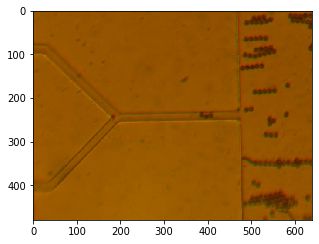

<Figure size 360x360 with 0 Axes>

In [3]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

exp = 0
frame = 1000


plt.figure(figsize = (5,5))
print(filenames[exp])
fname = filenames[exp]
video = pm.open(fname)
ax.imshow(video[frame])

In [4]:
# inverted = tp.preprocessing.invert_image(video[frame])
# fig, ax = plt.subplots(1,1,figsize=(5,5))

# plt.figure(figsize = (5,5))

# ax.imshow(inverted)

In [5]:
# video_inverted = tp.preprocessing.invert_image(video)



# img_filtered = tp.preprocessing.bandpass(video[0], lshort = 0.85, llong = 51)
# img_filtered

In [6]:
video

<FramesSequenceND>
Axes: 3
Axis 'x' size: 640
Axis 'y' size: 480
Axis 't' size: 4340
Pixel Datatype: uint8

In [7]:
video = as_gray(video)

Frame([[  2,   1,   1, ..., -28, -27, -25],
       [  3,   2,   1, ..., -26, -24, -22],
       [  2,   2,   1, ..., -20, -16, -15],
       ...,
       [  0,   0,   1, ...,  19,  17,  15],
       [  0,   0,   1, ...,  20,  17,  15],
       [  0,   0,   1, ...,  22,  18,  16]], dtype=int8)
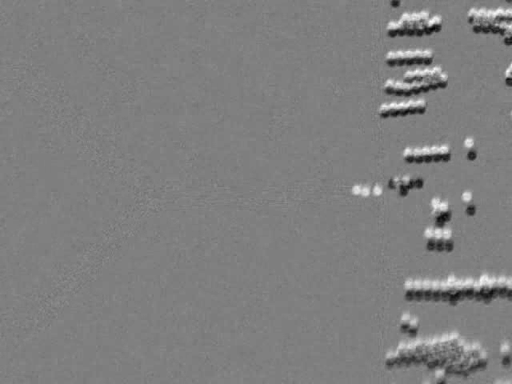

In [9]:
video[0].astype(np.int8)- video[666].astype(np.int8)

Frame([[98.2552, 96.2552, 93.3994, ..., 48.6546, 47.9392, 47.9392],
       [99.2552, 97.2552, 94.3273, ..., 53.2941, 53.6508, 54.6508],
       [99.2552, 98.2552, 95.2552, ..., 62.3394, 65.1231, 66.9789],
       ...,
       [89.8224, 89.8224, 90.9628, ..., 93.3994, 93.3994, 93.3994],
       [89.8224, 89.8224, 90.7503, ..., 93.109 , 93.109 , 93.109 ],
       [89.8224, 89.8224, 90.7503, ..., 93.109 , 93.109 , 93.109 ]])
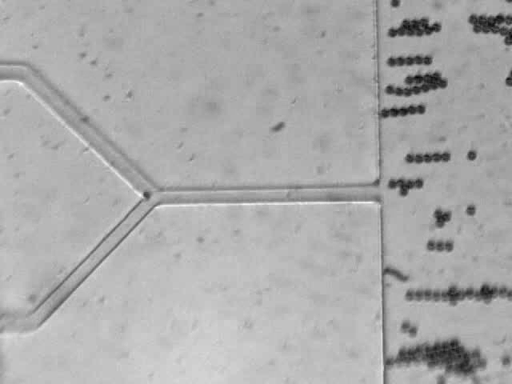

In [10]:
video[0]

In [11]:
# This function 

def substraction(frame, empty_channel_frame):
    
    frame_sub = (video[empty_channel_frame].astype(np.int8)- video[frame].astype(np.int8))
    
    return frame_sub

Frame([[ 4,  3,  1, ..., -1, -4, -1],
       [ 5,  3,  1, ...,  5,  4,  7],
       [ 4,  4,  1, ..., 16, 21, 23],
       ...,
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0, -1, ..., -1, -1, -1],
       [ 0,  0, -1, ..., -1, -1, -1]], dtype=int8)
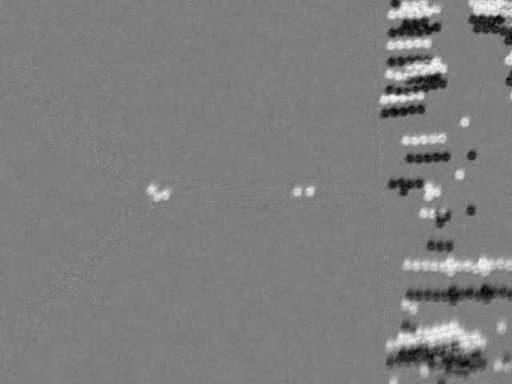

In [13]:
substraction(2000,0)

In [14]:
# sub.append(substraction(frame, 5191))

In [15]:
# img_filtered = tp.preprocessing.bandpass(inverted, lshort = 0.80, llong = 51, threshold=150/255, truncate=4)

# fig, ax = plt.subplots(1,1,figsize=(5,5))

# plt.figure(figsize = (5,5))

# ax.imshow(img_filtered)

In [16]:
diameter = 15
radius = diameter/2
radius

diameter = 2*radius

i = 0    

#@pipeline 
def locate(filename):

#     return tp.locate(as_gray(filename),2*round(radius)+1)
    return tp.locate(filename,2*round(radius)+1, threshold = 10, noise_size = 3, separation = 7.5, percentile = 20,
                    characterize = False)


loc = locate(sub)
loc

NameError: name 'sub' is not defined

In [17]:
# plt.figure(figsize=(10,10))
# tp.annotate(loc, sub);

## Whole video

Until here the used method works fine. Outside the channel the tracking does not work perfectly, but inside the channel it works good. Then, I can use this parameters to do the tracking and after that filter only the ROI.

The problem with this method is that the function tp.preprocessing.bandpass() is not working for the whole video. 

In [18]:
# @pipeline
# def gray(frame):

#     return frame[:, :, 0]

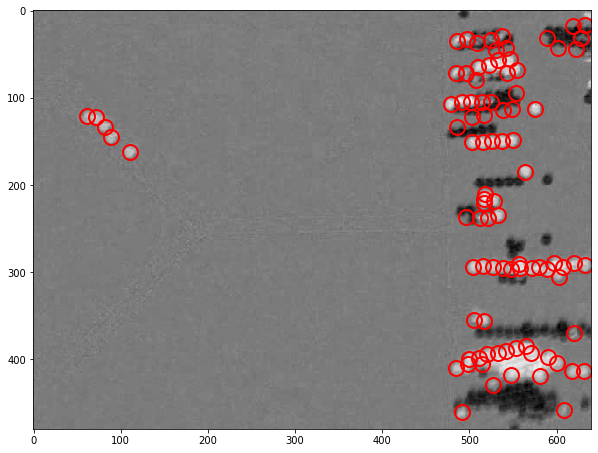

In [21]:

# %%time
diameter = 12
radius = diameter/2
radius

loc_df = []


sub = substraction(3773,0)

loc = tp.locate(sub,2*round(radius)+1, threshold = 10, noise_size = 1, separation = 3, percentile = 20,
                characterize = False, minmass = 1)


plt.figure(figsize=(10,10))
tp.annotate(loc, sub);

<span style="color:red">I need to find the good parameters for descern two particles attached. </span>


In the following loop I apply all the filters and generate a dataframe with all the detected particles with the corresponding frame value. 

In [29]:
len(video[::30])

178

# Loop to analyze the whole video

In [22]:
%%time
diameter = 12
radius = diameter/2
radius

loc_df = []
for i in range(0,len(video), 5): # Analyze 1 frame each 30 frame

    sub = substraction(i, 0)

    loc = tp.locate(sub,2*round(radius)+1, threshold = 10, noise_size = 1, separation = 3, percentile = 20,
                characterize = False, minmass = 1)
    loc['frame'] = i
    loc_df.append(loc.copy(deep = True))
    print(i)

/home/carolina/anaconda3/lib/python3.7/site-packages/trackpy/find.py:109: UserWarning: Image is completely black.
  warnings.warn("Image is completely black.", UserWarning)


0
5
10
15
20
25
30
35
40


/home/carolina/anaconda3/lib/python3.7/site-packages/trackpy/find.py:130: UserWarning: All local maxima were in the margins.
  warnings.warn("All local maxima were in the margins.", UserWarning)


45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995
1000
1005
1010
1015
1020
1025
1030
1035
1040
1045
1050
1055
1060
1065
1070
1075
1080
1085
1090
1095
1100
1105
1110
1115
1120
1125
1130
1135
1140
1145
1150
1155
1160
1165
1170
1175
1180
1185
1190
1195
1200
1205
1210
1215
1220
1225
1230
1235
1240
12

In [23]:
df = pd.concat(loc_df)

In [120]:
tracking = tp.link(df, 7, memory = 25)

Frame 4335: 85 trajectories present.


In [121]:
tracking = tracking.set_index(["frame","particle"])

In [122]:
tracking 

y           x         mass
frame particle                                     
50    0          34.000000  626.518367    23.867098
      1         190.000000  585.000000    10.131339
      2         227.000000  486.000000    10.326173
      3         226.654655  508.690691    32.439770
55    1         190.000000  585.000000    10.523373
...                    ...         ...          ...
4335  2          89.700748   22.864090   179.267058
      410        89.314689   32.088866   427.603343
      1359       68.781400  507.430336   651.351878
      1          99.648930  574.793637  1243.469629
      936       460.319444  581.673611    32.187601

[80737 rows x 3 columns]

In [123]:
track = tracking

### filtering tracked data
Now I am filtering only the particles that pass through the channel 

In [124]:
track["l_travelled"] = track.groupby("particle")["x"].transform(lambda x: x - x.max())

In [125]:
track.groupby('particle')['l_travelled'].min().to_frame()

l_travelled
particle             
0           -5.803536
1          -14.009975
2         -463.135910
3           -3.116809
4          -26.681948
...               ...
1488         0.000000
1489        -0.023977
1490         0.000000
1491        -0.993698
1492         0.000000

[1493 rows x 1 columns]

In [126]:
particles_in_channel = (track.groupby('particle')['l_travelled'].min() > -100).to_frame()

In [127]:
particles_in_channel = particles_in_channel.loc[particles_in_channel.l_travelled, :]

# I need to filter out the false row not the true!!!!

In [128]:
particles_in_channel

l_travelled
particle             
0                True
1                True
3                True
4                True
5                True
...               ...
1488             True
1489             True
1490             True
1491             True
1492             True

[1487 rows x 1 columns]

In [129]:
passed = particles_in_channel.index.unique()

In [130]:
passed

Int64Index([   0,    1,    3,    4,    5,    7,    8,    9,   10,   11,
            ...
            1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492],
           dtype='int64', name='particle', length=1487)

In [131]:
track = track.drop(index=passed, level = 1)


In [132]:
track

y           x        mass  l_travelled
frame particle                                                 
50    2         227.000000  486.000000   10.326173     0.000000
55    2         226.791289  485.789474   54.190453    -0.210526
60    2         228.080925  484.895954  127.622757    -1.104046
65    2         227.711002  484.464696  123.881540    -1.535304
      6         238.507463  498.000000   20.443505    -1.161710
...                    ...         ...         ...          ...
4330  410        89.169464   33.261564  532.697899  -325.881045
4335  481       117.665317   65.192083  496.896096  -418.683650
      162       105.660256   46.155449  139.479606  -451.605888
      2          89.700748   22.864090  179.267058  -463.135910
      410        89.314689   32.088866  427.603343  -327.053743

[3662 rows x 4 columns]

In [133]:
track.index.get_level_values('particle').unique()

Int64Index([2, 6, 149, 162, 410, 481], dtype='int64', name='particle')

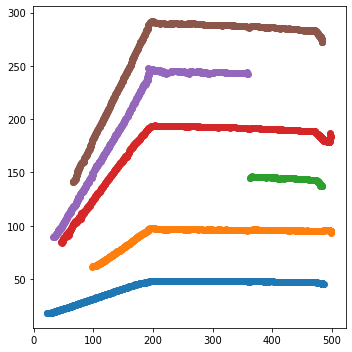

In [134]:
fig, ax = plt.subplots(1,figsize=(5,5))
i = 1
for p,trj_p in track.groupby("particle"):
    ax.plot(trj_p.x, trj_p.y*0.2*i, "o")
    i =i + 1 
plt.tight_layout()